# テンソルと画像処理

In [9]:
import numpy as np


def gray_show(img):
    plt.imshow(img, cmap = "gray", vmin = 0, vmax = 255)
    # plt.axis("off")
    plt.show()

## この章で学ぶこと

- numpy配列でモノクロ画像の描画
- matplotlibの使い方
- numpy配列でカラー画像の描画
- numpy配列で画像を自在に操り，フォトショップの機能を一部実装

章末には100本ノックがある. 



## 行列と画像

1画素8ビットのカラーチャンネルは，numpy配列の多次元行列として表現することが可能である. 



### 背景一色の画像

In [2]:
M, N = 300, 400
img = np.zeros((M, N), dtype = np.uint8)

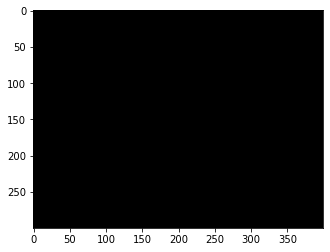

In [3]:
import matplotlib.pyplot as plt

plt.imshow(img, cmap = "gray", vmin = 0, vmax = 255)
plt.show()

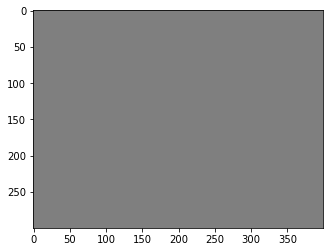

In [4]:
img = np.full((M, N), 127, dtype = np.uint8)
plt.imshow(img, cmap = "gray", vmin = 0, vmax = 255)
plt.show()

## 直線を引く

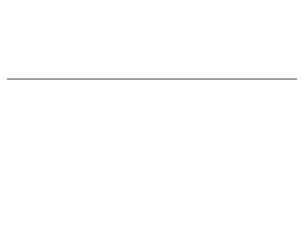

In [6]:
# 真っ白なキャンバスを用意して
img = np.full((M, N), 255, dtype = np.uint8)
# 黒い横線を引く
img[100, :] = 0
plt.imshow(img, cmap = "gray", vmin = 0, vmax = 255)
plt.axis("off")
plt.show()

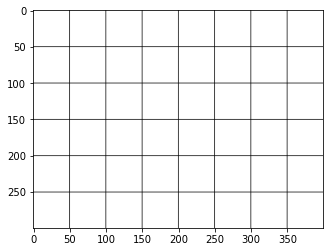

In [10]:
img = np.full((M, N), 255, dtype = np.uint8)
img[50::50, :] = 0
img[:, 50::50] = 0
gray_show(img)


### 斜めの線

境界 + 適当な幅のデータをプロットする。


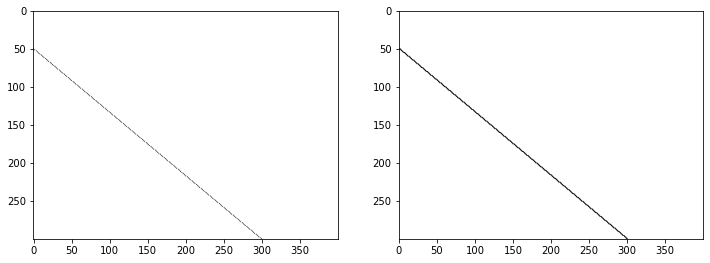

In [14]:
fig = plt.figure(figsize = (12, 6))
for i, width in enumerate([.5, 1]):
    img = np.full((M, N), 255, dtype = np.uint8)
    # mesh_gridのようなイメージ
    # img.shape点を作成している
    y_ind, x_ind = np.indices(img.shape)
    ax = fig.add_subplot(1, 2, i + 1)
    # 境界からの距離を求めて（横幅）その点をプロット
    mask = np.abs(x_ind - 300 / 250 * (y_ind -50)) <= width
    img[mask] = 0
    ax.imshow(img, cmap = "gray", vmin = 0, vmax = 255)
plt.show()

In [13]:
np.indices((M, N))

array([[[  0,   0,   0, ...,   0,   0,   0],
        [  1,   1,   1, ...,   1,   1,   1],
        [  2,   2,   2, ...,   2,   2,   2],
        ...,
        [297, 297, 297, ..., 297, 297, 297],
        [298, 298, 298, ..., 298, 298, 298],
        [299, 299, 299, ..., 299, 299, 299]],

       [[  0,   1,   2, ..., 397, 398, 399],
        [  0,   1,   2, ..., 397, 398, 399],
        [  0,   1,   2, ..., 397, 398, 399],
        ...,
        [  0,   1,   2, ..., 397, 398, 399],
        [  0,   1,   2, ..., 397, 398, 399],
        [  0,   1,   2, ..., 397, 398, 399]]])

## matplotlibでの複数グラフの書き方

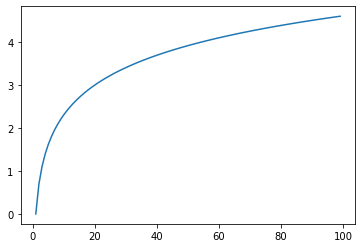

In [15]:
x = np.arange(100)
plt.plot(x, np.log(x))
plt.show()

`fig.gca`はget current axesの略であり，axesを取得する際に使うことが可能である. 
`fig.get_axes`はfigureの中にどのaxesがあるのかを見ることが可能である. 

In [16]:
fig = plt.figure()
fig.get_axes()

[]

<Figure size 432x288 with 0 Axes>

In [17]:
ax = fig.gca()

In [18]:
fig.get_axes()

[<AxesSubplot:>]

In [20]:
fig.clear() # axesが解消される
fig.get_axes()

[]

### 複数のaxes

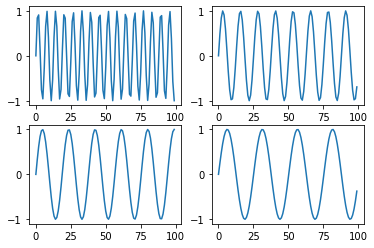

In [21]:
fig = plt.figure()
for i in range(4):
    # グラフの配置の形 x, y とグラフの位置
    ax = fig.add_subplot(2, 2, i + 1)
    ax.plot(x, np.sin(x / (i + 1)))
plt.show()

In [22]:
# プロットしてもaxesは残っている
fig.get_axes()

[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]

### 画像をプロット

0
25
51
76
102
127
153
178
204


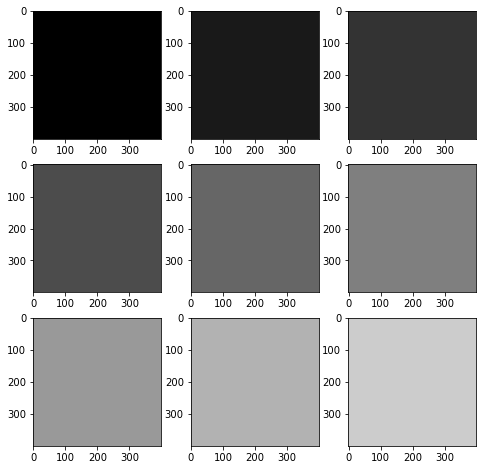

In [28]:
fig = plt.figure(figsize = (8, 8))
for i in range(9):
    ax = fig.add_subplot(3, 3, i + 1)
    print(255 * i // 10)
    img = np.full((400, 400), 255 * i // 10, dtype = np.uint8)
    ax.imshow(img, cmap = "gray", vmin = 0, vmax = 255)


In [24]:
1 // 10

0

## 市松模様を作る

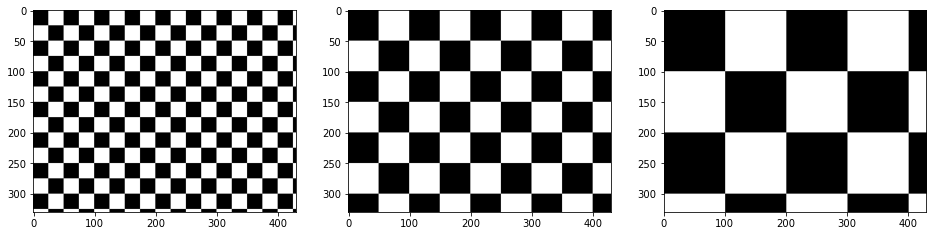

In [30]:
alist = [25, 50, 100]
fig   = plt.figure(figsize = (16, 8))
for l, a in enumerate(alist):
    img = np.zeros((330, 430), dtype = np.uint8)
    for i in range(int(np.ceil(img.shape[0] / a))):
        for j in range(int(np.ceil(img.shape[1] / a))):
            if (i + j) % 2 == 1:
                # numpy配列は要素数を超えても問題がない！！！！
                img[i * a:(i + 1) * a, j * a:(j + 1) * a] = 255
    ax = fig.add_subplot(1, 3, l + 1)
    ax.imshow(img, cmap = "gray", vmin = 0, vmax = 255)


In [31]:
a = np.arange(10)
a[1:12]

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

## グラデーション

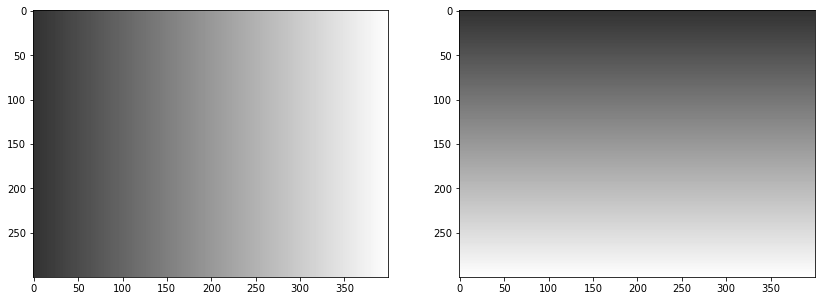

In [37]:
start_color = 50
end_color   = 255
fig = plt.figure(figsize = (14, 8))

# 横方向
img = np.zeros((300, 400), np.uint8)
for i in range(img.shape[0]):
    img[i,:] = np.linspace(start_color, end_color, img.shape[1], dtype = img.dtype)
ax = plt.subplot(1, 2, 1)
ax.imshow(img, cmap = "gray", vmin = 0, vmax = 255)


# 縦方向
img = np.zeros((300, 400), np.uint8)
for i in range(img.shape[1]):
    img[:, i] = np.linspace(start_color, end_color, img.shape[0], dtype = img.dtype)
ax = plt.subplot(1, 2, 2)
ax.imshow(img, cmap = "gray", vmin = 0, vmax = 255)



ブロードキャストを使った特殊な書き方. 

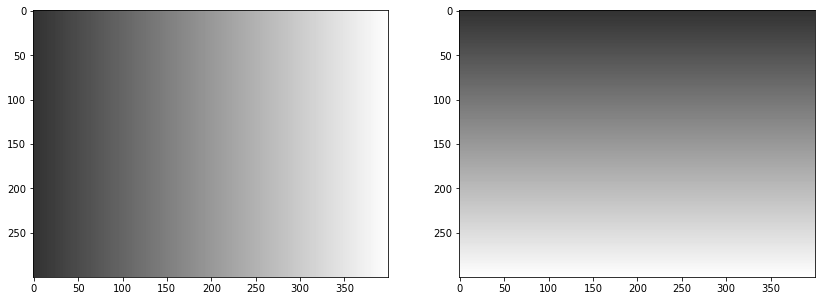

In [38]:
start_color = 50
end_color = 255
fig = plt.figure(figsize=(14, 8))
img_shape = (300, 400)# 横方向
img = np.broadcast_to(np.linspace(start_color,end_color, img.shape[1],                                  dtype=np.uint8)[None, :], img_shape)
ax = plt.subplot(1, 2, 1)
ax.imshow(img, cmap="gray", vmin=0, vmax=255)# 縦方向
img = np.broadcast_to(np.linspace(start_color,end_color, img.shape[0],                                   dtype=np.uint8)[:,None], img_shape)
ax = plt.subplot(1, 2, 2)
ax.imshow(img, cmap="gray", vmin=0, vmax=255)
plt.show()

次の部分が本質なのかと思うけど，内容的にはブロードキャストを明示的に実行しているということなのかと思う。その際に，ブロードキャストの対象の形状をブロードキャストする先の形状に合わせていることがわかる. 

In [40]:
np.broadcast_to(
    np.linspace(start_color,end_color, img.shape[1], dtype=np.uint8)[None, :],  
    img_shape)

array([[ 50,  50,  51, ..., 253, 254, 255],
       [ 50,  50,  51, ..., 253, 254, 255],
       [ 50,  50,  51, ..., 253, 254, 255],
       ...,
       [ 50,  50,  51, ..., 253, 254, 255],
       [ 50,  50,  51, ..., 253, 254, 255],
       [ 50,  50,  51, ..., 253, 254, 255]], dtype=uint8)